In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Inhalt
1. Hausaufgabe und T-test mit Scipy Funktion
2. U-test
3. Signifikanzniveau (Confindence level)
4. Box plots
5. Chi-square test

# Hausaufgabe und T-Test

In [2]:
electra = pd.read_csv("../Datensaetze/bette006_Galdos_Electra_nodes=characters.csv", sep="\t", index_col=0)

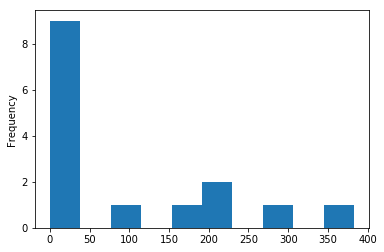

In [3]:
electra["pers_mes_sps"].plot.hist(bins=10)

In [4]:
electra_female_characters = electra.loc[electra["sex"]=="F"]
electra_male_characters = electra.loc[electra["sex"]=="M"]

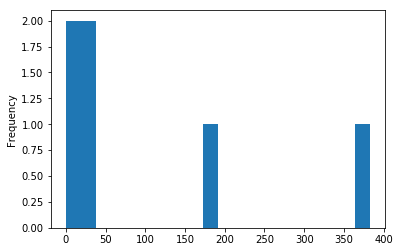

In [5]:
electra_female_characters["pers_mes_sps"].plot.hist(bins=20)

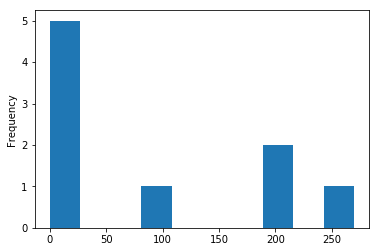

In [6]:
electra_male_characters["pers_mes_sps"].plot.hist()

([array([5., 0., 1., 0., 0., 2., 0., 1., 0., 0.]),
  array([4., 0., 0., 0., 1., 0., 0., 0., 0., 1.])],
 array([  0. ,  38.3,  76.6, 114.9, 153.2, 191.5, 229.8, 268.1, 306.4,
        344.7, 383. ]),
 <a list of 2 Lists of Patches objects>)

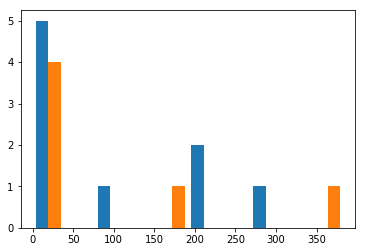

In [7]:
plt.hist([electra_male_characters["pers_mes_sps"],electra_female_characters["pers_mes_sps"]])

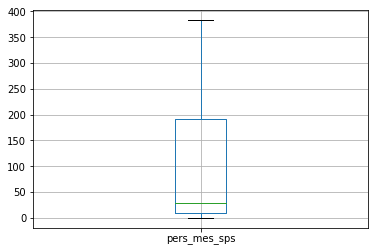

In [8]:
electra.boxplot("pers_mes_sps")

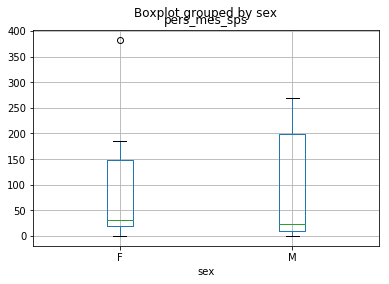

In [9]:
electra.boxplot("pers_mes_sps",by="sex")

In [10]:
stats.ttest_ind( electra_female_characters["pers_mes_sps"], electra_male_characters["pers_mes_sps"])

Ttest_indResult(statistic=0.23826560108729, pvalue=0.8153895785816787)

# U-test

In [11]:
stats.mannwhitneyu(electra_male_characters["pers_mes_sps"], electra_female_characters["pers_mes_sps"])

MannwhitneyuResult(statistic=24.5, pvalue=0.40675009364662684)

In [12]:
sp_authors = pd.read_csv("../Datensaetze/sp-authors.tsv", sep="\t")

# Boxplots

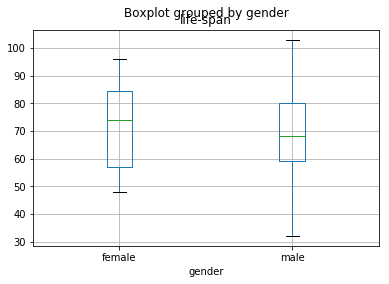

In [13]:
sp_authors.boxplot("life-span",by="gender")

In [14]:
sp_authors["dead_in_war"] = 0
dead_authors_dictatorship = sp_authors.loc[(sp_authors["death"] >= 1936) & (sp_authors["death"] <= 1945) ]
print(dead_authors_dictatorship.shape)
dead_authors_dictatorship.head()
sp_authors.loc[dead_authors_dictatorship.index, "dead_in_war"] = 1

(26, 12)


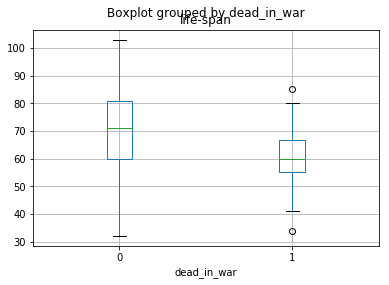

In [15]:
sp_authors.boxplot("life-span",by="dead_in_war")

# Signifikanzniveau (Confindence level)

Spurious correlations
https://www.tylervigen.com/spurious-correlations


P-value in XKCD:
https://xkcd.com/1478/

<img src="https://imgs.xkcd.com/comics/p_values_2x.png" width="300"/>

P-hacking in XKCD:
https://www.explainxkcd.com/wiki/index.php/882:_Significant
<img src="https://www.explainxkcd.com/wiki/images/3/3f/significant.png" width="300"/>



# Chi-Square

In [16]:
electra = pd.read_csv("../Datensaetze/bette006_Galdos_Electra_nodes=characters.csv", sep="\t", index_col=0)

In [17]:
electra.head()

,id,label,sex,role,nature,importance,position,pers_mes_characters,pers_mes_sps,pers_mes_rss,pers_mes_scenes
0,#elec,Electra,F,protagonist,person,primary,1,38069,383,176,36
1,#evar,Evarista,F,other,person,secondary,2,14688,185,63,26
2,#maxi,Máximo,M,lover,person,primary,3,25321,270,123,24
3,#pant,Don Salvador Pantoja,M,antagonist,person,primary,4,25123,208,86,24
4,#marq,El Marqués de Ronda,M,other,person,secondary,5,17618,198,105,29


In [18]:
female_characters = electra.loc[electra["sex"] == "F"]
female_characters.shape

(6, 11)

In [19]:
male_characters = electra.loc[electra["sex"] == "M"]
male_characters.shape

(9, 11)

In [20]:
observed_prop = [sum(female_characters["pers_mes_sps"])/electra["pers_mes_sps"].sum(), sum(male_characters["pers_mes_sps"])/electra["pers_mes_sps"].sum()]
observed_prop

[0.43821742066171504, 0.5617825793382849]

In [21]:
observed = [sum(female_characters["pers_mes_sps"]), sum(male_characters["pers_mes_sps"])]
observed

[649, 832]

In [22]:
electra["pers_mes_sps"].sum()/2

740.5

In [23]:
stats.chisquare([female_characters["pers_mes_sps"].sum(), male_characters["pers_mes_sps"].sum()])

Power_divergenceResult(statistic=22.61242403781229, pvalue=1.981987775595304e-06)

In [24]:
stats.chisquare(
    [female_characters["pers_mes_sps"].sum(), male_characters["pers_mes_sps"].sum()],
    [0.5,0.5])

Power_divergenceResult(statistic=2223889.0, pvalue=0.0)

In [25]:
stats.chisquare(observed,[0.4,0.6])

Power_divergenceResult(statistic=2203748.1666666665, pvalue=0.0)

In [26]:
stats.chisquare(observed,[740.5,740.5])

Power_divergenceResult(statistic=22.61242403781229, pvalue=1.981987775595304e-06)

In [27]:
set(electra["importance"])

{'minor', 'primary', 'secondary'}

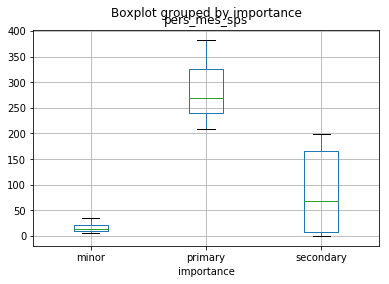

In [34]:
electra.boxplot("pers_mes_sps", by="importance")

In [28]:
minor_characters = electra.loc[electra["importance"] == "minor"]
minor_characters.shape

(6, 11)

In [29]:
secondary_characters = electra.loc[electra["importance"] == "secondary"]
secondary_characters.shape

(6, 11)

In [30]:
primary_characters = electra.loc[electra["importance"] == "primary"]
primary_characters.shape

(3, 11)

In [31]:
[minor_characters["pers_mes_sps"].sum(),
                 secondary_characters["pers_mes_sps"].sum(),
                 primary_characters["pers_mes_sps"].sum()]

[101, 519, 861]

Do primary, secondary and minor characters talk in the play with statistical difference?

In [32]:
stats.chisquare([minor_characters["pers_mes_sps"].sum(),
                 secondary_characters["pers_mes_sps"].sum(),
                 primary_characters["pers_mes_sps"].sum()])

Power_divergenceResult(statistic=586.9601620526671, pvalue=3.493174343751909e-128)

Do the number of primary, secondary and minor characters show statistical difference?

In [36]:
stats.chisquare([
    minor_characters.shape[0],
    secondary_characters.shape[0],
    primary_characters.shape[0],
    
])

Power_divergenceResult(statistic=1.2000000000000002, pvalue=0.5488116360940265)